# Reinforcement Learning
# Project 2 - *Value Function Approximation*
### Name: Yash Nitin Mantri
### UB Number: 50313926


# Part 1.1 - Implement DQN

Here, we just try implementing a sample DQN algorithm.

Here, we do not use any environment to apply the designed algorithm.

We apply the algorithm on 2 environments in the next step

In [0]:
# Initializing ENVIRONMENT

In [0]:
# Creating Environment Functions
class DqnAgent:
  def __init__(self):

  # Execute the given action
  def step(self):

  # Reset the environment attributes
  def reset(self):

  # Display the environment
  def render(self):

  # Experience replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        q_update = reward + self.gamma * np.max(model_2.predict(next_state)[0])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model

model_1 = Sequential()
model_1.add(Dense(256, input_dim=4, activation='relu') )
model_1.add(Dense(4, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=4, activation='relu') )
model_2.add(Dense(4, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

In [0]:
# Training

# Get the training agent and required parameters
dqn_agent = DqnAgent()
rewards_list = []
epsilons_list = []
epochs = 500
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005


# Main Algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 4])

  total_reward = 0
  terminate = False
  while terminate == False:  
    action=dqn_agent.step(state, epsilon)
    next_state,reward,terminate,info = env.step(action)
    reward=np.sign(reward)
    next_state = np.reshape(next_state, [1, 4])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    total_reward += reward
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
  
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)   
    df = pd.DataFrame(rewards_list, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  rewards_list.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(rewards_list)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(rewards_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# Part 1.2 - A - Apply DQN to OpenAI Gym Environment
Environment selected = CartPole-v0

Environment Explanation:

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.

The system is controlled by applying a force of +1 or -1 to the cart.

The pendulum starts upright, and the goal is to prevent it from falling over.

A reward of +1 is provided for every timestep that the pole remains upright.

The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials.

In [0]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "CartPole-v0"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85
# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        q_update = reward + self.gamma * np.max(model_2.predict(next_state)[0])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=4, activation='relu') )
model_1.add(Dense(2, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=4, activation='relu') )
model_2.add(Dense(2, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0
total_average_reward 9
average_reward 0

 Rewards List Graph:


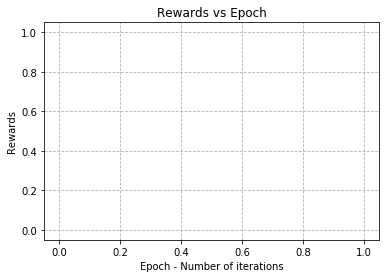


 Rewards List Graph:


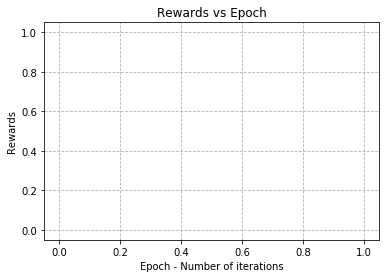

episode 100
total_average_reward 955
average_reward 9

 Rewards List Graph:


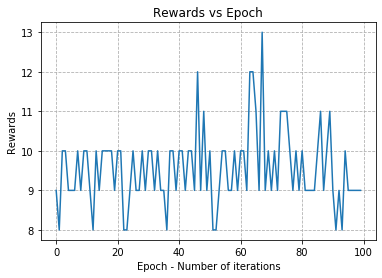


 Rewards List Graph:


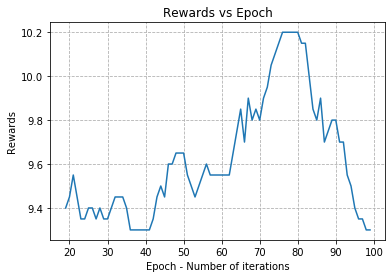

episode 200
total_average_reward 961
average_reward 9

 Rewards List Graph:


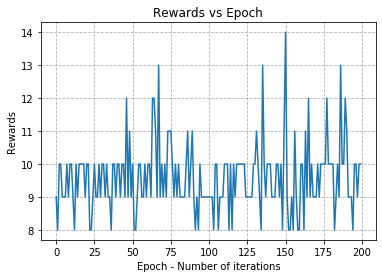


 Rewards List Graph:


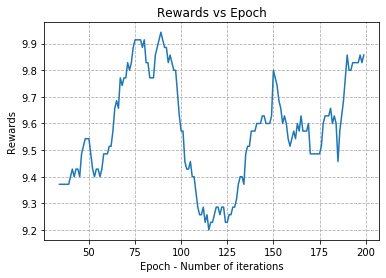

episode 300
total_average_reward 997
average_reward 9

 Rewards List Graph:


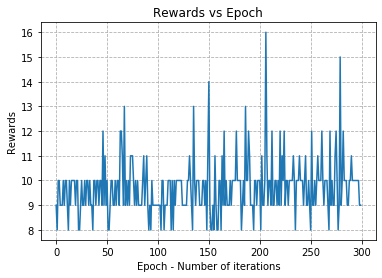


 Rewards List Graph:


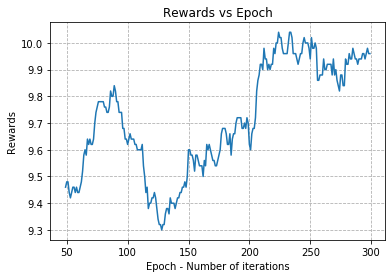

episode 400
total_average_reward 1039
average_reward 10

 Rewards List Graph:


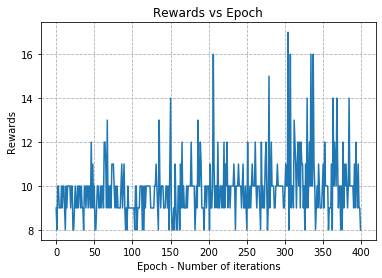


 Rewards List Graph:


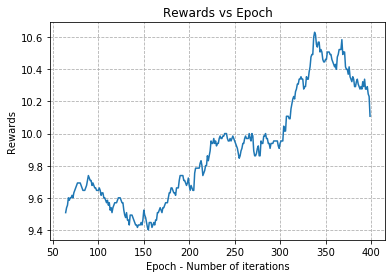


 Rewards List Graph:


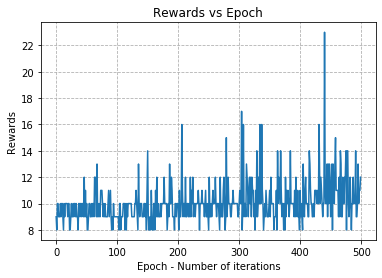


 Rewards List Graph:


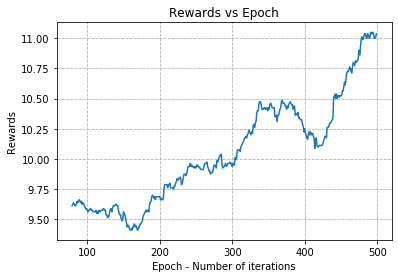


 Epsilons List Graph:


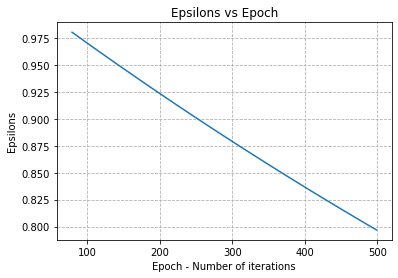

In [19]:
# Training

# Get the training agent and required parameters
dqn_agent = DqnAgent()
rewards_list = []
epsilons_list = []
epochs = 500
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005
total_average_reward = 0

# Main Algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 4])

  total_reward = 0
  terminate = False
  while terminate == False:  
    action=dqn_agent.step(state, epsilon)
    next_state,reward,terminate,info = env.step(action)
    reward=np.sign(reward)
    next_state = np.reshape(next_state, [1, 4])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    total_reward += reward
    total_average_reward += reward
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
  
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)
    print ("total_average_reward %d"%total_average_reward)
    average_reward = total_average_reward/100
    total_average_reward = 0
    print ("average_reward %d"%average_reward)
    
    print('\n Rewards List Graph:')
    plt.plot(rewards_list)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    df = pd.DataFrame(rewards_list, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  rewards_list.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(rewards_list)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(rewards_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# Part 1.2 - B - Apply DQN to OpenAI Gym Environment
Environment selected = CartPole-v1

Environment Explanation:

1) A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.

2) The system is controlled by applying a force of +1 or -1 to the cart.

3) The pendulum starts upright, and the goal is to prevent it from falling over.

4) A reward of +1 is provided for every timestep that the pole remains upright.

5) The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

CartPole-v1 defines "solving" as getting average reward of 475.0 over 100 consecutive trials.

In [0]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "CartPole-v1"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85
# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience Replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        q_update = reward + self.gamma * np.max(model_2.predict(next_state)[0])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=4, activation='relu') )
model_1.add(Dense(2, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=4, activation='relu') )
model_2.add(Dense(2, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0

 Rewards List Graph:


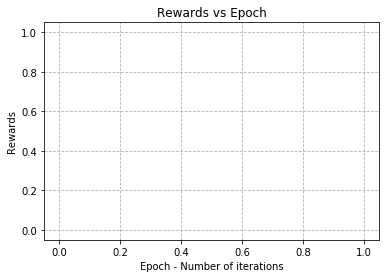

episode 100

 Rewards List Graph:


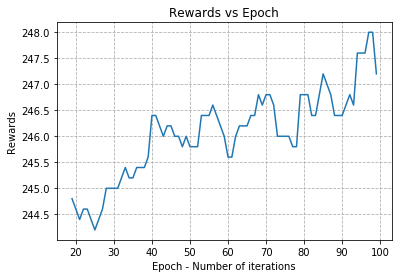

episode 200

 Rewards List Graph:


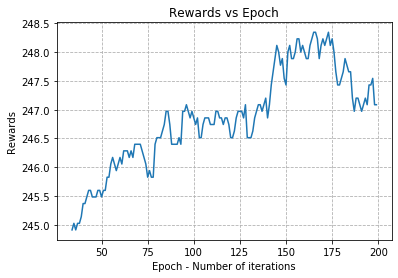

episode 300

 Rewards List Graph:


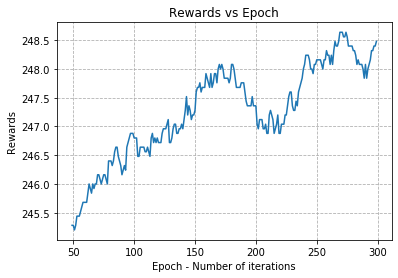

episode 400

 Rewards List Graph:


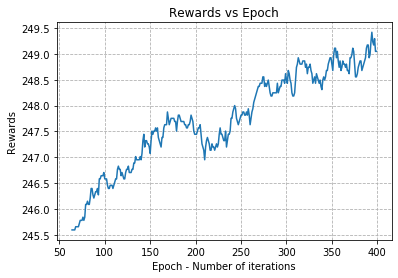

episode 500

 Rewards List Graph:


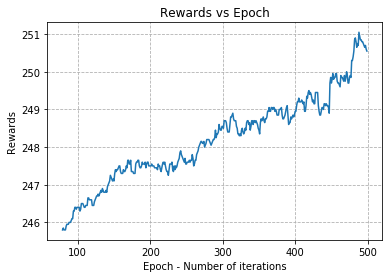

episode 600

 Rewards List Graph:


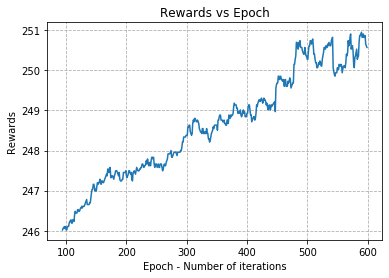

episode 700

 Rewards List Graph:


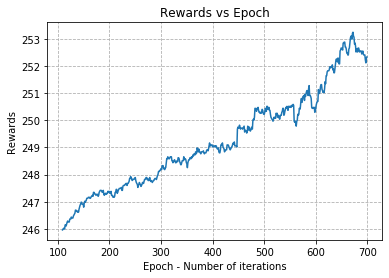

episode 800

 Rewards List Graph:


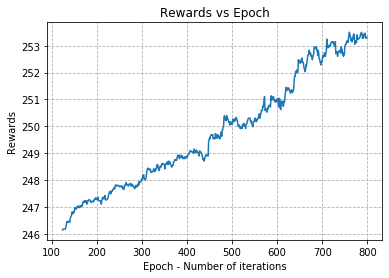

episode 900

 Rewards List Graph:


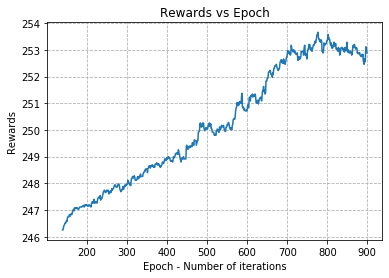


 Rewards List Graph:


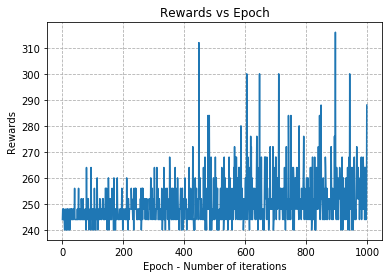


 Rewards List Graph:


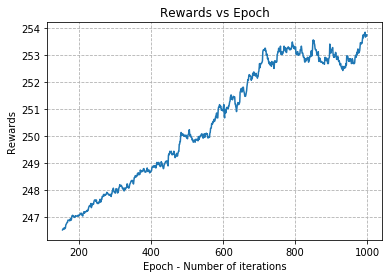


 Epsilons List Graph:


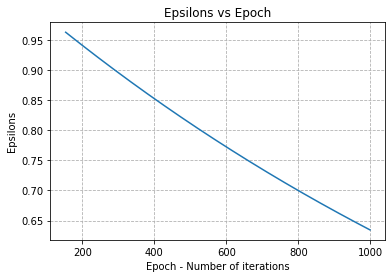

In [54]:
# Training

# Get the agent and required training parameters
dqn_agent = DqnAgent()
rewards_list = []
epsilons_list = []
epochs = 1000
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005

# Main Algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 4])

  total_reward = 0
  terminate = False
  while terminate == False:  
    action=dqn_agent.step(state,epsilon)
    next_state,reward,terminate,info = env.step(action)
    total_reward += reward
    if terminate:
      reward = 210 + total_reward
    else:
      reward=np.sign(reward)
    total_reward += reward
    next_state = np.reshape(next_state, [1, 4])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    memory.append((state, action, reward, next_state, terminate))
    state = next_state

  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)   
    df = pd.DataFrame(rewards_list, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  rewards_list.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(rewards_list)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(rewards_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# Part 2 - Improving DQN
Algorithm selected = Double Q-Learning (DDQN)

Environment selected = CartPole-v1

Environment Explanation:

1) A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.

2) The system is controlled by applying a force of +1 or -1 to the cart.

3) The pendulum starts upright, and the goal is to prevent it from falling over.

4) A reward of +1 is provided for every timestep that the pole remains upright.

5) The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

CartPole-v1 defines "solving" as getting average reward of 475.0 over 100 consecutive trials.

In [0]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "CartPole-v1"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85

# print(env.observation_space.shape[0]) # observation_space = 4
# print(env.action_space.n) # action_space = 2

In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience Replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        max_q_update = np.argmax(model_1.predict(next_state))
        q_update = reward + self.gamma * (model_2.predict(next_state)[0][max_q_update])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=4, activation='relu') )
model_1.add(Dense(2, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=4, activation='relu') )
model_2.add(Dense(2, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0

 Rewards List Graph:


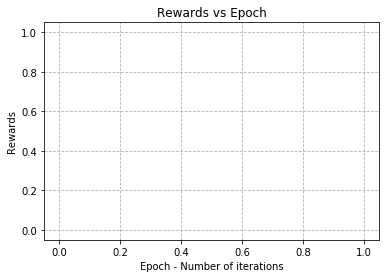

episode 100

 Rewards List Graph:


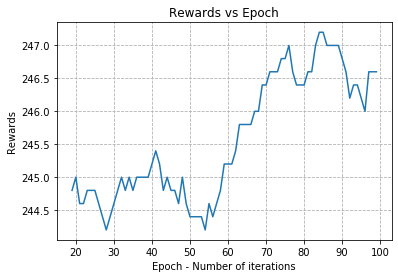

episode 200

 Rewards List Graph:


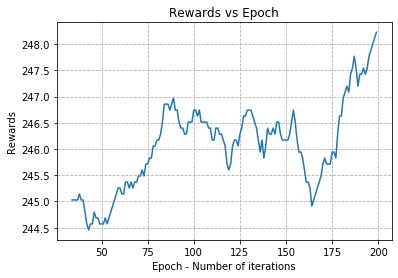

episode 300

 Rewards List Graph:


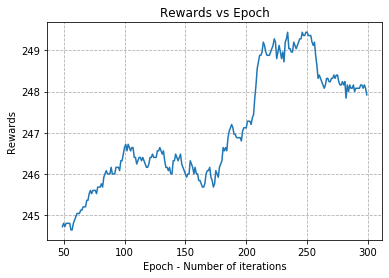

episode 400

 Rewards List Graph:


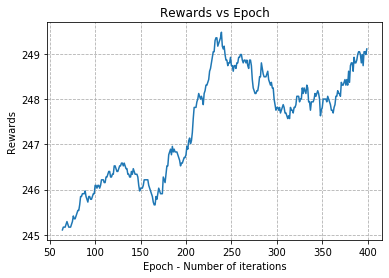

episode 500

 Rewards List Graph:


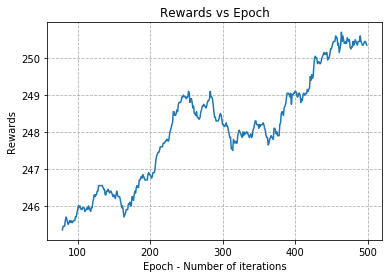

episode 600

 Rewards List Graph:


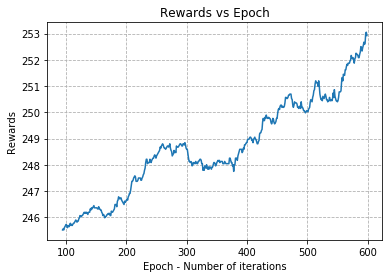

episode 700

 Rewards List Graph:


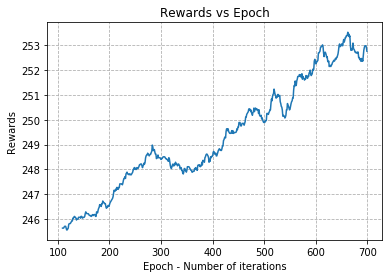

episode 800

 Rewards List Graph:


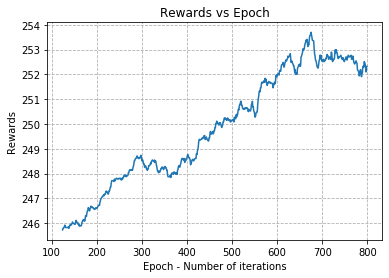

episode 900

 Rewards List Graph:


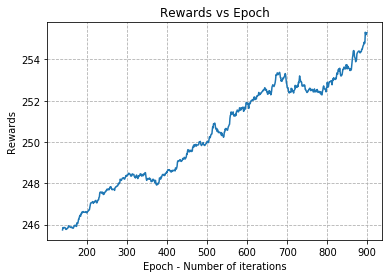


 Rewards List Graph:


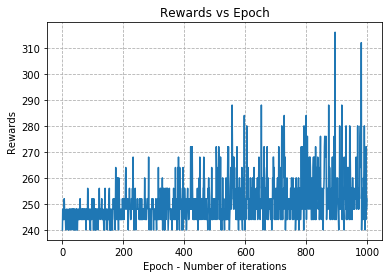


 Rewards List Graph:


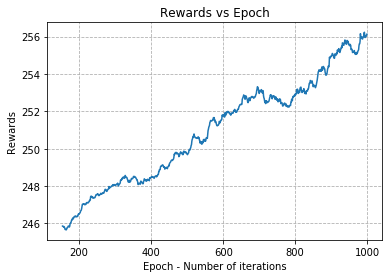


 Epsilons List Graph:


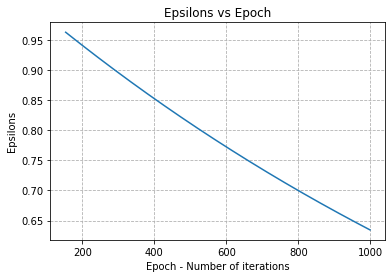

In [59]:
# Training

# get training agent and initialize required parameters
dqn_agent = DqnAgent()
rewards_list = []
epsilons_list = []
epochs = 1000
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005

# Main algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 4])
  total_reward = 0
  terminate = False
  
  while terminate == False:  
    action=dqn_agent.step(state,epsilon)
    next_state,reward,terminate,info = env.step(action)
    total_reward += reward
    if terminate:
      reward = 210 + total_reward
    else:
      reward=np.sign(reward)
    total_reward += reward
    next_state = np.reshape(next_state, [1, 4])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
    
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)   
    df = pd.DataFrame(rewards_list, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  rewards_list.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(rewards_list)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(rewards_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()